# Preparation

In [26]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import warnings


warnings.filterwarnings('ignore')


RANDOM_STATE = 21

# Data Loading and Observation

In [27]:
df = pd.read_csv('../../../datasets/insurance.csv')

display(df.head(20))
display(df.describe())
display(df.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [28]:
# Checking null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Dataset Visualization

### Pairplot

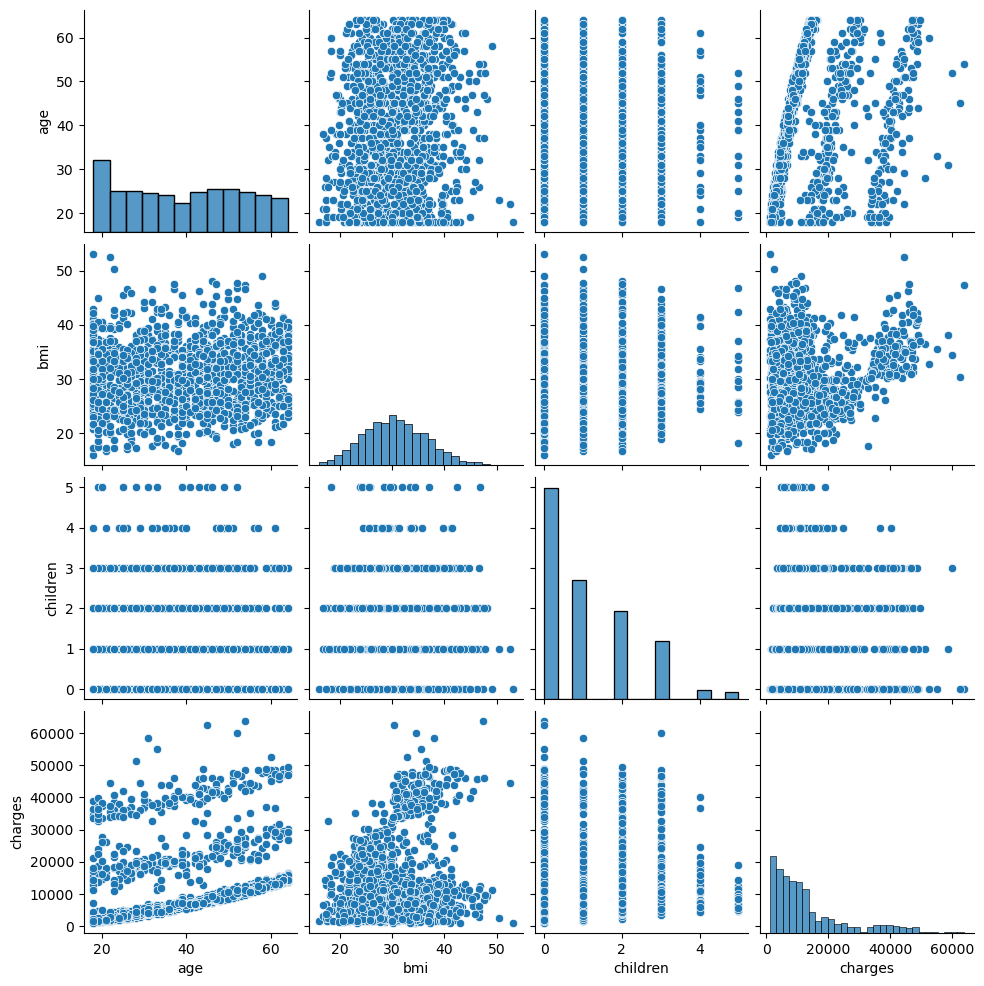

In [29]:
sns.pairplot(df)
plt.show()

### Correlation Matrix

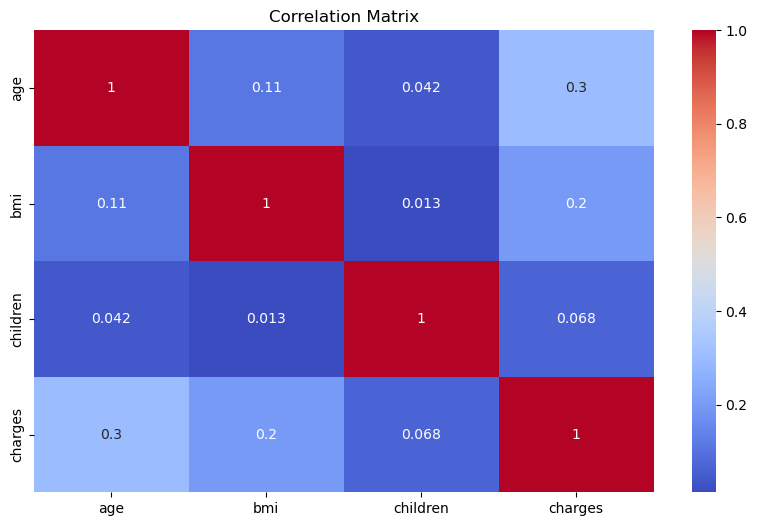

In [30]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# **TASK 1: Multiple Linear Regression**

## 1. Identify feature and and target variable

In [31]:
features = [c for c in df.columns if c != 'charges']
target = 'charges'

print(f'Selected features: {features}')
print(f'Selected target: {target}')

X = df[features]
y = df[target]

display(X.head())
display(y.head())

Selected features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
Selected target: charges


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## 2. Split data into training and testing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=RANDOM_STATE)

## 3. Data Preprocessing

In [33]:
df_features = df[features]

numeric_cols = df_features.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_features.select_dtypes(include=['object', 'category']).columns.tolist()


print(f'Numeric columns: {numeric_cols}')
print(f'Categorical columns: {categorical_cols}')

Numeric columns: ['age', 'bmi', 'children']
Categorical columns: ['sex', 'smoker', 'region']


In [34]:
df[features]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols), # feature scaling for numerical data
    ("cat", OneHotEncoder(), categorical_cols)   # encoding data for categorical data
])

## 4. Define the model

Since the dataset characteristics look roughly straight line, I can do experiment with **Linear regression** based model

In [35]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

## 5. Model training

In [36]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## 6. Prediction

In [37]:
y_pred = model.predict(X_test)

## 7. Model evaluation

### **R^2**, **MSE**, and **MAE**

In [38]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 4207.48
MSE: 36445810.20
R²: 0.7337


### Predicted vs actual charges

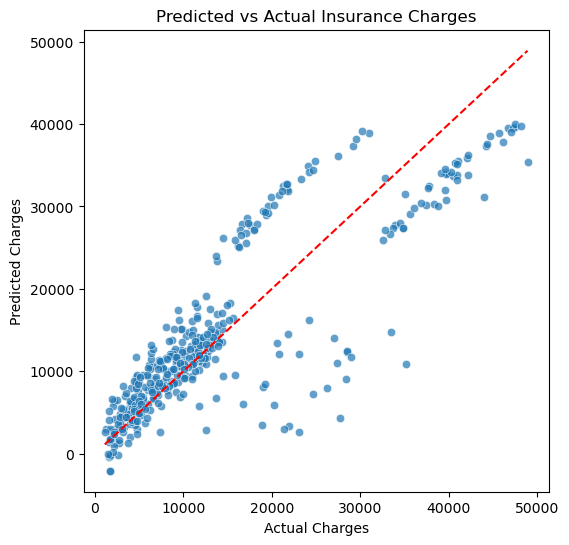

In [39]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Insurance Charges")
plt.show()

### Residal error

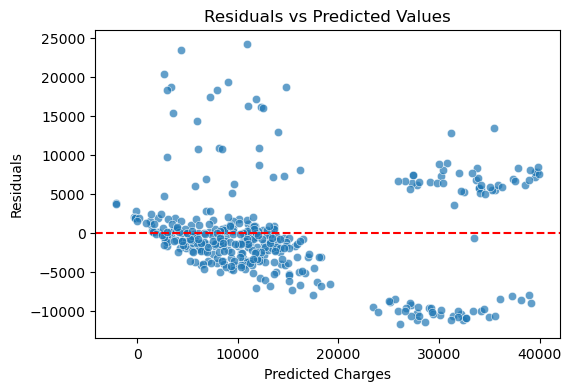

In [40]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

## 8. Conclusion